In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
import math

In [2]:
from scipy.stats import binom
prob = 1 - binom.cdf(56, 100, 0.5)

print(str(round(prob*100, 1))+"%")

9.7%


In [3]:
##Find the number of coin flips a person would need to guess correctly for us to believe they're clairvoyant.
print(binom.ppf(0.95,100,0.5)+1)

59.0


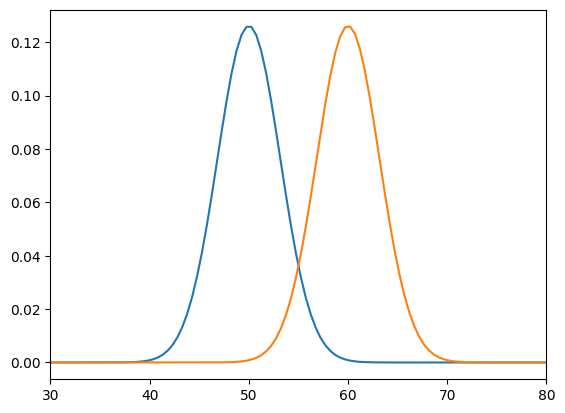

In [4]:
##So far so good. What if instead I said, "I'm not perfect, 
#but I can predict coin tosses 60% of the time. Which is still good, which is still valuable."

#What do we do in this case? Sure, we can do exactly what we did earlier and when I predict 57 times, we can reject my claim.

#But what if I say, "Wait a minute. I said 60 and I got 57, that sounds pretty good to me."

#Interpretation:

#"I happened to have a poor guessing day, and that's why my results aren't quite statistically significant!"

#What do we say to that? The issue here is that there is no longer a single null hypothesis that we prove or disprove. 
#Instead, we have two competing hypotheses:
#* Hypothesis A: There is no predictive power * Hypothesis B: There is a 60% predictive power

#Each is a normal curve, with one centered at 50% and the other at 60%
mu = 50
variance = 10
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 200)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

mu = 60
variance = 10
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 200)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

plt.xlim(30,80)
plt.show()

In [5]:
print (1 - binom.cdf(57, 100, 0.5))
print (binom.cdf(57, 100, 0.6))

0.06660530960360689
0.30326012984344564


In [6]:
#Since we have a claim at 50 and 60, we can pick the mid-point,
#which is 55. We can say if I can predict over 55, then I have predictive power. 
#This would mean that we have decreased our confidence level.
print (1 - binom.cdf(55, 100, 0.5))
print (binom.cdf(54, 100, 0.6))

0.13562651203691767
0.1310904526197477


In [7]:
#Be biased
#But it is not neccessary that we bias the two hypotheses equally and pick the midpoint the way we did. 
#The cut-off point can be anywhere. Currently, our error margins are even. 
#The chance that someone has predictive power and we say no is 13% and the chance that someone has no power and 
#we say they do is also 13%. As we change the cutoff, one error goes down and the other goes way up.
#For example, if we stuck with the original 95% on a coin being fair:
binom.ppf(0.95, 100, 0.5) #this is the inverse of the cdf functions above

58.0

In [8]:
#Then our cutff is 58. Our two errors will be:
print (1-binom.cdf(58, 100, 0.5))
print (binom.cdf(58, 100, 0.6))

0.04431304005703385
0.3774673238778288


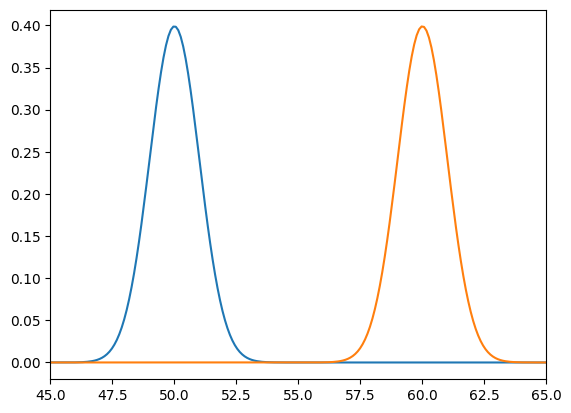

In [9]:
#Increase sample size
#The best scenario though is to increase the sample size. Imagine what happens we did 1000 tosses instead of 100.
mu = 50
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 1000)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

mu = 60
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 1000)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

plt.xlim(45,65)
plt.show()

In [10]:
print (binom.ppf(0.95,1000,0.5))
print (binom.ppf(0.05,1000,0.6))

526.0
574.0


In [11]:
#What are our errors now?
print (1-binom.cdf(550, 1000, 0.5))
print (binom.cdf(550, 1000, 0.6))

0.0006958707972110068
0.0007412028990060172
